# Corey Austen - Homework 1 - Notebook 4

## Loading in packages and checking directory

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%pwd

'C:\\Users\\Corey\\Google Drive\\Corey - School\\Spring 2018 B\\BIA 6303 - Predictive Models\\HW_1'

In [2]:
cd /Users/Corey/Google Drive/Corey - School/Spring 2018 B/BIA 6303 - Predictive Models/HW_1

C:\Users\Corey\Google Drive\Corey - School\Spring 2018 B\BIA 6303 - Predictive Models\HW_1


### Loading Data into a Dataframe

In [3]:
df = pd.read_csv('prostate.csv', sep=",")

### Checking column names and datatypes

In [4]:
df.columns

Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45',
       'lpsa'],
      dtype='object')

In [5]:
df.dtypes

lcavol     float64
lweight    float64
age          int64
lbph       float64
svi          int64
lcp        float64
gleason      int64
pgg45        int64
lpsa       float64
dtype: object

### Moving target variable to the front of the dataframe

In [6]:
#Set the target variable as lpsa. 
# designate target variable name
targetName = 'lpsa'
targetSeries = df[targetName]
#remove target from current location and insert in collum 0
del df[targetName]
df.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
df.head(10)

,lpsa,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.430783,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,-0.162519,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,-0.162519,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,-0.162519,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,0.371564,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0
5,0.765468,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0
6,0.765468,0.737164,3.473518,64,0.615186,0,-1.386294,6,0
7,0.854415,0.693147,3.539509,58,1.536867,0,-1.386294,6,0
8,1.047319,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0
9,1.047319,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0


### Checking for any missing values

In [7]:
#This function will find all missing values and which row they are in.
#Credit to Nikos T. - https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/26266451

def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
    
missing_values_table(df)

Your selected dataframe has 9 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### Setting the target and features

In [8]:
#setting target and features
df.target=df['lpsa'] 
df.features=df.drop(['lpsa'], axis=1)                         
print(df.target.shape)
print(df.features.shape)

(97,)
(97, 8)


C:\Users\Corey\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\Users\Corey\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


## Regression Models

### Linear Regression

This model is not great, but the Variance score is pretty decent when compared to the other models I ran.

In [19]:
# Linear Regression-Ordinary Least Squares
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

# fit a linear regression model to the data
model_LR = LinearRegression(normalize=True)
model_LR.fit(df.features, df.target)
print(model_LR)
# make predictions
expected = df.target
predicted = model_LR.predict(df.features)
# summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print("Coef", model_LR.intercept_,model_LR.coef_)
print("Mean Squared Error =", mse)
print("Linear Regression Score =",model_LR.score(df.features, df.target))
print("Explained Varience Score", explained_variance_score(expected, predicted))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
Coef 0.6693990271843564 [ 0.58702288  0.45446064 -0.01963721  0.10705435  0.76615588 -0.10547357
  0.04513596  0.00452532]
Mean Squared Error = 0.45528998416790356
Linear Regression Score = 0.654753466137644
Explained Varience Score 0.654753466137644


### Linear Regression - Cross Validation

The scores are all over the place.

In [22]:
#verify LR with Cross Validation
from sklearn.model_selection  import train_test_split, cross_val_score
scores = cross_val_score(model_LR, df.features, df.target, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()

Cross Validation Score for each K [  -4.74619321  -33.83976572  -62.81916498 -116.89996314  -23.72413242
 -103.13097801 -307.48442218   -6.61868877 -142.00246283   -3.60351046]


-80.48692817089201

### Linear Regression - Coefficient Variance

As you can see, this model has fairly high coefficient variance.  Using penalties (alphas) in the next models should help with this issue.

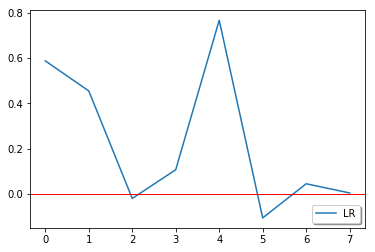

In [11]:
#Showing the variance of the Coefficient for LR
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.axhline(linewidth=1, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

### Ridge Regression

This model is worse than the Linear Regression, but not by much.

In [12]:
# Ridge Regression
from sklearn import datasets
from sklearn.linear_model import Ridge
# fit a ridge regression model to the data
model_rr = Ridge(alpha=18.75)
model_rr.fit(df.features, df.target)
print(model_rr)
# make predictions
expected = df.target
predicted = model_rr.predict(df.features)
# summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print("Coef", model_rr.intercept_,model_rr.coef_)
print("Mean Squared Error =", mse)
print("Ridge Regression Score =",model_rr.score(df.features, df.target))
print("Explained Varience Score", explained_variance_score(expected, predicted))

Ridge(alpha=18.75, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Coef 1.4006084102772132 [ 0.50157659  0.25969039 -0.01235839  0.10439739  0.26721734  0.04193077
  0.00804262  0.00517783]
Mean Squared Error = 0.4980562901742774
Ridge Regression Score = 0.6223237632488752
Explained Varience Score 0.6223237632488752


### Ridge Regression- Grid Search and Cross Validation

This Grid Search helps tune the model by cross validating with various alphas in place.  As you can see in the code below, I left in and commented out the multiple steps I took to fine tune the model, which showed the best alpha as 18.75.

In [18]:
# use a full grid over several parameters and cross validate 5 times
from sklearn.model_selection import GridSearchCV
#param_grid = {"alpha": [.01, .1, 1, 2, 5]}
#param_grid = {"alpha": [5, 6, 7, 8, 9]}
#param_grid = {"alpha": [9, 10, 12, 15, 20]}
#param_grid = {"alpha": [20, 25, 30, 40, 50]}
#param_grid = {"alpha": [18, 19, 20, 21, 22]}
param_grid = {"alpha": [18.5, 18.75, 19, 19.5, 19.75]}
# run grid search
grid_search = GridSearchCV(model_rr, param_grid=param_grid,n_jobs=-1,cv=5)
grid_search.fit(df.features, df.target)
print("Grid Scores", grid_search.cv_results_)
print("Best", grid_search.best_params_)   

Grid Scores {'mean_fit_time': array([0.02376246, 0.00501618, 0.00371165, 0.00370994, 0.00230641]), 'std_fit_time': array([0.01337951, 0.00217286, 0.00112467, 0.00194508, 0.00024602]), 'mean_score_time': array([0.00080276, 0.00120182, 0.00059934, 0.00080109, 0.00090199]), 'std_score_time': array([0.00024577, 0.00068055, 0.0001972 , 0.00024616, 0.00037475]), 'param_alpha': masked_array(data=[18.5, 18.75, 19, 19.5, 19.75],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 18.5}, {'alpha': 18.75}, {'alpha': 19}, {'alpha': 19.5}, {'alpha': 19.75}], 'split0_test_score': array([-3.65043122, -3.65981087, -3.66913897, -3.68764242, -3.69681872]), 'split1_test_score': array([-14.40095379, -14.38133146, -14.3619216 , -14.32371282,
       -14.3049015 ]), 'split2_test_score': array([-12.03125705, -12.03286757, -12.03457218, -12.03824849,
       -12.04021302]), 'split3_test_score': array([-13.6736313 , -13.67480458, -13.67596

### Ridge Regression - Coefficient Variance

This graph shows that the tuned alpha lowered the coefficient varience.

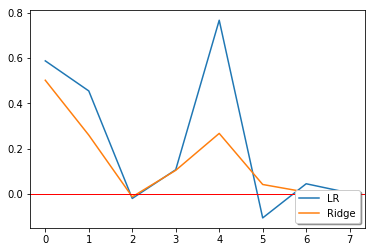

In [13]:
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.plot(model_rr.coef_, label='Ridge')
plt.axhline(linewidth=1, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

### Lasso Regression

This model did not perform as well as the Ridge Regression.

In [14]:
# Lasso Regression
# fit a LASSO model to the data
from sklearn.linear_model import Lasso
model_lr = Lasso(alpha=.21)
model_lr.fit(df.features, df.target)
print(model_lr)
# make predictions
expected = df.target
predicted = model_lr.predict(df.features)
# summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print("Coef", model_lr.intercept_,model_lr.coef_)
print("Mean Squared Error =", mse)
print("Lasso Regression Score =",model_lr.score(df.features, df.target))
print("Explained Varience Score", explained_variance_score(expected, predicted))

Lasso(alpha=0.21, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Coef 1.6270564559096594 [ 0.48050171  0.         -0.          0.01902194  0.          0.
  0.          0.00823329]
Mean Squared Error = 0.6192191057358084
Lasso Regression Score = 0.5304459632527391
Explained Varience Score 0.5304459632527391


### Lasso Regression- Grid Search and Cross Validation

Again, I left in the various rounds of tuning in this grid search, which landed on .21.

In [27]:
# use a full grid over several parameters and cross validate 5 times
#param_grid = {"alpha": [.01, .1, 1, 2, 5]}
#param_grid = {"alpha": [.025, .05, .1, .25, .5]}
#param_grid = {"alpha": [.2, .225, .25, .3, .4]}
param_grid = {"alpha": [.18, .19, .2, .21, .22]}

# run grid search
grid_search = GridSearchCV(model_lr, param_grid=param_grid,n_jobs=-1,cv=5)
grid_search.fit(df.features, df.target)
print("Grid Scores", grid_search.cv_results_)
print("Best", grid_search.best_params_)  

Grid Scores {'mean_fit_time': array([0.00701833, 0.00240803, 0.00200562, 0.00220313, 0.002005  ]), 'std_fit_time': array([2.90584764e-03, 8.02185831e-04, 6.37857707e-06, 4.01803730e-04,
       8.99694551e-07]), 'mean_score_time': array([0.00080376, 0.00100045, 0.00060406, 0.0006011 , 0.00080209]), 'std_score_time': array([4.01890210e-04, 5.23088407e-06, 4.93237683e-04, 4.90797334e-04,
       4.01044441e-04]), 'param_alpha': masked_array(data=[0.18, 0.19, 0.2, 0.21, 0.22],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.18}, {'alpha': 0.19}, {'alpha': 0.2}, {'alpha': 0.21}, {'alpha': 0.22}], 'split0_test_score': array([-4.48927181, -4.57538325, -4.66293124, -4.75191556, -4.84233621]), 'split1_test_score': array([-12.14096653, -11.98511742, -11.83674187, -11.69527363,
       -11.55976273]), 'split2_test_score': array([-10.30706457, -10.26735403, -10.2358602 , -10.23950285,
       -10.28497695]), 'split3_test_

### Lasso Regression - Coefficient Variance

The coefficient variance is lower than that of the Ridge model, but it doesn't seem to have helped it beat out that model.

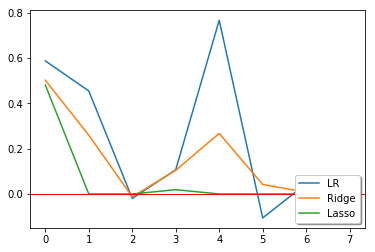

In [29]:
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.plot(model_rr.coef_, label='Ridge')
plt.plot(model_lr.coef_, label='Lasso')
plt.axhline(linewidth=1, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

### Elastic Net Regression

This model actually did worse than the Lasso Model.

In [15]:
# ElasticNet Regression
# fit a ElasticNet model to the data
from sklearn.linear_model import ElasticNet
model_en = ElasticNet(alpha=.375)
model_en.fit(df.features, df.target)
print(model_en)
# make predictions
expected = df.target
predicted = model_en.predict(df.features)
# summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print("Coef", model_en.intercept_,model_en.coef_)
print("Mean Squared Error =", mse)
print("ElasticNet Regression Score =",model_en.score(df.features, df.target))
print("Explained Varience Score", explained_variance_score(expected, predicted))

ElasticNet(alpha=0.375, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Coef 1.673687089494106 [ 0.42842992  0.         -0.          0.02710884  0.          0.
  0.          0.00917069]
Mean Squared Error = 0.6404705831409897
ElasticNet Regression Score = 0.5143309614544846
Explained Varience Score 0.5143309614544846


### Elastic Net Regression- Grid Search and Cross Validation

4 Rounds of grid searching and the best alpha ended up being 0.375

In [36]:
# use a full grid over several parameters and cross validate 5 times
#param_grid = {"alpha": [.01, .1, 1, 2, 5]}
#param_grid = {"alpha": [.025, .05, .1, .25, .5]}
#param_grid = {"alpha": [.3, .4, .5, .6, .7]}
param_grid = {"alpha": [.35, .375, .4, .425, .45]}

# run grid search
grid_search = GridSearchCV(model_en, param_grid=param_grid,n_jobs=-1,cv=5)
grid_search.fit(df.features, df.target)
print("Grid Scores", grid_search.cv_results_)
print("Best", grid_search.best_params_) 

Grid Scores {'mean_fit_time': array([0.00801506, 0.0027102 , 0.00260663, 0.00200582, 0.0021029 ]), 'std_fit_time': array([0.0040752 , 0.00075551, 0.00073676, 0.00031711, 0.00049219]), 'mean_score_time': array([0.00090284, 0.00110898, 0.00080419, 0.00060177, 0.0003046 ]), 'std_score_time': array([0.0002012 , 0.00097541, 0.00024728, 0.00020015, 0.00024871]), 'param_alpha': masked_array(data=[0.35, 0.375, 0.4, 0.425, 0.45],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.35}, {'alpha': 0.375}, {'alpha': 0.4}, {'alpha': 0.425}, {'alpha': 0.45}], 'split0_test_score': array([-4.92017366, -5.04250141, -5.16431731, -5.28558302, -5.40720296]), 'split1_test_score': array([-11.7004813 , -11.4714401 , -11.26331339, -11.07538594,
       -10.90696634]), 'split2_test_score': array([-10.27532705, -10.34304219, -10.42993133, -10.5423815 ,
       -10.6758678 ]), 'split3_test_score': array([-13.26238034, -13.14660315, -13.044

### Elastic Net Regression - Coefficient Variance

Based on this, the coefficient variance is very similar to that of the Lasso Model.

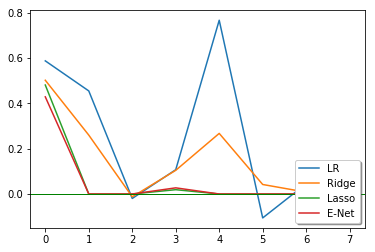

In [16]:
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.plot(model_rr.coef_, label='Ridge')
plt.plot(model_lr.coef_, label='Lasso')
plt.plot(model_en.coef_, label='E-Net')
plt.axhline(linewidth=1, color='g') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

### Lasso Lars Regression

The worst model of the bunch.

In [17]:
# Lasso Lars Regression
from sklearn import linear_model
model_ll = linear_model.LassoLars(alpha=.04)
model_ll.fit(df.features, df.target)
print(model_ll)
# make predictions
expected = df.target
predicted = model_ll.predict(df.features)
# summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print("Coef", model_ll.intercept_,model_ll.coef_)
print("Mean Squared Error =", mse)
print("ElasticNet Regression Score =",model_ll.score(df.features, df.target))
print("Explained Varience Score", explained_variance_score(expected, predicted))

LassoLars(alpha=0.04, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)
Coef 1.9627601065858298 [0.37422101 0.         0.         0.         0.04815277 0.
 0.         0.        ]
Mean Squared Error = 0.7550838980398128
ElasticNet Regression Score = 0.42741964980854097
Explained Varience Score 0.4274196498085411


### Lasso Lars Regression- Grid Search and Cross Validation

Four rounds of searching and cross validation landed on 0.04.

In [43]:
# use a full grid over several parameters and cross validate 5 times
#param_grid = {"alpha": [.01, .1, 1, 2, 5]}
#param_grid = {"alpha": [.025, .05, .1, .25, .5]}
#param_grid = {"alpha": [.03, .04, .05, .06, .07]}
param_grid = {"alpha": [.035, .0375, .04, .0425, .045]}
# run grid search
grid_search = GridSearchCV(model_ll, param_grid=param_grid,n_jobs=-1,cv=5)
grid_search.fit(df.features, df.target)
print("Grid Scores", grid_search.cv_results_)
print("Best", grid_search.best_params_) 

Grid Scores {'mean_fit_time': array([0.02446418, 0.00391097, 0.00481281, 0.00431499, 0.00291066]), 'std_fit_time': array([0.00771518, 0.00111662, 0.00136728, 0.00081225, 0.00020152]), 'mean_score_time': array([0.00090098, 0.00060186, 0.00080228, 0.00090289, 0.0005991 ]), 'std_score_time': array([0.00037621, 0.00020022, 0.00024538, 0.00036793, 0.00020188]), 'param_alpha': masked_array(data=[0.035, 0.0375, 0.04, 0.0425, 0.045],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.035}, {'alpha': 0.0375}, {'alpha': 0.04}, {'alpha': 0.0425}, {'alpha': 0.045}], 'split0_test_score': array([-6.21564222, -6.45806555, -6.70580472, -6.95885974, -7.21723059]), 'split1_test_score': array([-9.1217053 , -9.04288721, -9.03796672, -9.10694383, -9.24174301]), 'split2_test_score': array([-6.78270519, -6.42807799, -6.03937985, -5.62334892, -5.22389987]), 'split3_test_score': array([-8.26370894, -8.03890101, -7.85234372, -7.7040370

### Lasso Lars Regression - Coefficient Variance

The coefficient variance was similar to that of Lasso and Elastic Net.

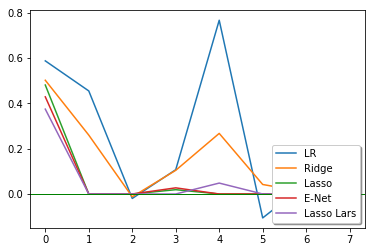

In [18]:
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.plot(model_rr.coef_, label='Ridge')
plt.plot(model_lr.coef_, label='Lasso')
plt.plot(model_en.coef_, label='E-Net')
plt.plot(model_ll.coef_, label='Lasso Lars')
plt.axhline(linewidth=1, color='g') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

## Final Comments

The Linear Regression Model turned out to be the best model.  However, none of them were "great".  The Mean Squared Error was 0.455 and the model score was 0.655.